In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_h2_combine-varyproposals'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import h2_combine as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [3]:
modelexp_nm = 'modelexp_varyproposalsv2_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['read_len'] == 1, 'read_len'] = 3
df.loc[df['proposal_type'] == 'smart', 'proposal_type'] = 'Default'

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'pace_num', 'threshold', 'min_gt_frequency', 'read_len',
       'proposal_type', 'R2 overall'],
      dtype='object')
(652, 18)


## plot

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_h2_combine-varyproposals/modelexp_varyproposalsv2_rs.pdf ...


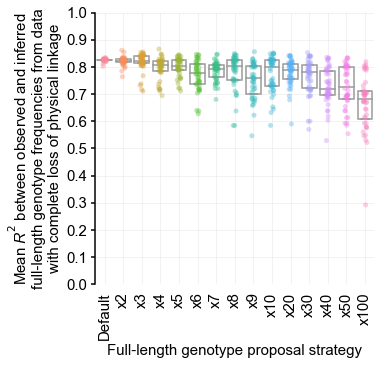

In [5]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (5, 5))

dfs = df[df['read_len'] == 3]
# dfs = dfs[dfs['data_noise'] <= 0.25]

# dfs['noise_str'] = dfs['noise']
# dfs['data_noise_str'] = [100*s for s in dfs['data_noise']]

sns.boxplot(
    x = 'proposal_type',
    y = 'R2 overall',
    data = dfs,
    color = 'white',
    fliersize = 0,
    ax = ax,
    whis = 0,
)
sns.stripplot(
    x = 'proposal_type',
    y = 'R2 overall',
    data = dfs,
    alpha = 0.4,
    ax = ax,
)

sns.despine()
ytick_res = 0.1
plt.yticks(np.arange(0, 1 + ytick_res, ytick_res))
plt.grid(alpha = 0.2)

plt.xlabel('Full-length genotype proposal strategy');
plt.ylabel('Mean $R^2$ between observed and inferred\nfull-length genotype frequencies from data\nwith complete loss of physical linkage');
plt.xticks(rotation = 90);
# locs, labels = plt.xticks()
# updated_labels = [f'{100*float(s.get_text()):.1f}' for s in labels]
# plt.xticks(locs, updated_labels)
# plt.xticks(locs, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15, 17.5, 20, 22.5, 25])

##

sns.despine(trim = False, bottom = True)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'{modelexp_nm}.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## stats

In [7]:
agg_df = df.groupby('proposal_type')['R2 overall'].describe().reset_index()
display(agg_df)

agg_df.to_csv(results_dir + f'{modelexp_nm}_aggstats.csv')

,proposal_type,count,mean,std,min,25%,50%,75%,max
0,Default,43.0,0.825543,0.005128,0.801951,0.826199,0.826593,0.827035,0.833563
1,x10,44.0,0.770909,0.067271,0.584592,0.728135,0.799660,0.825226,0.851202
2,x100,44.0,0.667940,0.100157,0.292238,0.606751,0.683355,0.710780,0.819024
3,x2,43.0,0.820887,0.015627,0.764134,0.817757,0.822210,0.827523,0.861006
4,x20,44.0,0.778963,0.049360,0.590023,0.757023,0.788950,0.811838,0.841725
5,x3,44.0,0.817553,0.034566,0.710750,0.812756,0.822774,0.840086,0.854467
6,x30,44.0,0.763928,0.065234,0.569916,0.720863,0.779252,0.805442,0.852521
7,x4,44.0,0.795261,0.040278,0.694280,0.785145,0.805401,0.821082,0.865632
8,x40,43.0,0.728239,0.067577,0.528764,0.695005,0.717545,0.785459,0.835150
9,x5,43.0,0.799057,0.035064,0.711184,0.787619,0.803772,0.826531,0.844598


## explore

In [9]:
df.head()

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,pace_num,threshold,min_gt_frequency,read_len,noise,proposal_type,R2 overall
0,0,0,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.909167,36.0,0.843216,0.188348,0.265045,0.820370,0.915500,0.965899,0.972070,2,5,0,3,0.00,smart,0.826584
1,1,1,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.885207,36.0,0.819715,0.226897,0.108577,0.754397,0.927360,0.968791,0.974579,2,5,0,3,0.01,smart,0.783591
2,2,2,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.902892,36.0,0.857424,0.175655,0.358776,0.844144,0.941232,0.969278,0.975415,2,5,0,3,0.02,smart,0.815214
3,3,3,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.887750,36.0,0.848819,0.197004,0.154225,0.832717,0.923345,0.969902,0.976018,2,5,0,3,0.03,smart,0.788101
4,4,4,varynoisev2_p2--pace_num-2--threshold-5--min_g...,0.864211,36.0,0.800117,0.244202,0.058819,0.756342,0.894051,0.968258,0.976798,2,5,0,3,0.04,smart,0.746860


In [8]:
agg_df = df.groupby('proposal_type')['num_proposed_gts'].describe().reset_index()
display(agg_df)

agg_df.to_csv(results_dir + f'{modelexp_nm}_aggstats_numproposedgts.csv')

KeyError: 'Column not found: num_proposed_gts'